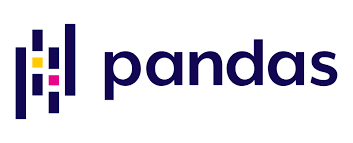

# BIC02 - Visualisasi Data

Nama: Angelique Keyko Haryono

NRP: 2073016

### Week 5 - Formatting Tampilan Data Frame

1. Cara Import Module dan Mengecek Version
2. Mempersiapkan Data Frame
3. Melakukan Formatting Tampilan Data Frame

#### Cara Import Module dan Mengecek Version

Dibawah ini adalah cara yang bisa digunakan untuk mengimport module. Kita juga bisa mengecek version dari module yang akan digunakan. Sebaiknya kita melakukan pengecekan version terlebih dahulu karena bisa terjadi perbedaan output dan tampilan jika berbeda version.

In [1]:
#Ini merupakan cara untuk mengimport module.
import pandas as pd
import numpy as np

#Cara lain selain cara diatas
#import pandas
#import numpy

#Ini merupakan cara yang bisa digunakan untuk mengecek version dari module yang akan digunakan. 
print(pd.__version__)
print(np.__version__)

#Cara lain selain cara diatas
#print(pandas.__version__)
#print(numpy.__version__)

1.1.3
1.19.2


#### Mempersiapkan Data Frame

Kita akan mempersiapkan data frame dummy yang terdiri dari 5 baris dan 2 kolom. Untuk membentuk object data frame, kita bisa menggunakan perintah `pd.DataFrame()`.

In [2]:
n_rows = 5 #Ini merepresentasikan jumlah baris yaitu 5 baris.
n_cols = 2 #Ini merepresentasikan jumlah kolom yaitu 2 kolom.
cols = ['omset', 'operasional'] #Setiap kolom akan diberi label omset dan operasional.

#Dalam data frame ini akan terisi dengan angka random (Integer) dari 1-20.
#Jumlah baris dan kolom sesuai dengan yang sudah ditentukan diatas.
df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df

,omset,operasional
0,1,16
1,1,2
2,16,12
3,2,14
4,11,16


In [3]:
#Supaya bisa menjadi bentuk rupiah, kita kalikan omset dengan sataan 100.000 dan operasional dikalikan dengan satuan 10.000.
#Underscore dalam Python biasanya dikenla sebagai ignore character dan salah satu kegunaannya yaitu
#bisa dimanfaatkan sebagai digital placeholder.
df['omset'] = df['omset'] * 100_000
df['operasional'] = df['operasional'] * 10_000
df

,omset,operasional
0,100000,160000
1,100000,20000
2,1600000,120000
3,200000,140000
4,1100000,160000


In [4]:
#Membentuk kolom tanggal.
#Mengenerate index dengan deret waktu dan parameternya per hari menggunakan method pd.util.testing.makeDateIndex().
df.index = pd.util.testing.makeDateIndex(n_rows, freq='D')

#Kita harus mereset index untuk menjadikan index date time menjadi kolom biasa dengan nama index.
df = df.reset_index()
df = df.rename(columns={'index':'tanggal'})
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\__init__.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing


,tanggal,omset,operasional
0,2000-01-01,100000,160000
1,2000-01-02,100000,20000
2,2000-01-03,1600000,120000
3,2000-01-04,200000,140000
4,2000-01-05,1100000,160000


#### Melakukan Formatting Tampilan Data Frame

Disini kita akan melakukan formatting dimana akan menambahkan penanda rupiah pada omset dan operasional, serta mengganti format tanggal menjadi day-month-year. Langkah-langkahnya adalah:
- Spesifikasikan suatu Dictionary dan tampung ke dalam sebuah variabel. Setiap keynya disesuaikan dengan nama kolom. Urutannya tidak berpengaruh. Setiap vaue pada key berisi formatting (dengan tipe data String) terhadap datanya.
- Menerapkan formatting dengan method `df.style.format` dan setelah itu mengadopsi Dictionary yang tadi dibuat.
- Memprint hasil format.

Hal yang penting adalah objek dalam variabel laporan bukanlah bertipe data data frame, melainkan pandas.io.formats.style.Styler (objek Styler). Untuk objek data framenya tetap di variabel df.

In [5]:
formatku = {'tanggal':'{:%d/%m/%y}',    #format tanggal menjadi day-month-year.
            'operasional':'Rp {:.2f}',  #menambahkan penanda rupiah dan menyertakan 2 digit nilai di belakang koma.
            'omset':'Rp {:.2f}'}        #menambahkan penanda rupiah dan menyertakan 2 digit nilai di belakang koma.

laporan = df.style.format(formatku)

#Hasil format ditampung di variabel laporan.
laporan

,tanggal,omset,operasional
0,01/01/00,Rp 100000.00,Rp 160000.00
1,02/01/00,Rp 100000.00,Rp 20000.00
2,03/01/00,Rp 1600000.00,Rp 120000.00
3,04/01/00,Rp 200000.00,Rp 140000.00
4,05/01/00,Rp 1100000.00,Rp 160000.00


In [6]:
type(laporan)

pandas.io.formats.style.Styler

In [7]:
#Kita bisa menyembunyikan index pada Styler dengan method hide_index().
laporan.hide_index()

tanggal,omset,operasional
01/01/00,Rp 100000.00,Rp 160000.00
02/01/00,Rp 100000.00,Rp 20000.00
03/01/00,Rp 1600000.00,Rp 120000.00
04/01/00,Rp 200000.00,Rp 140000.00
05/01/00,Rp 1100000.00,Rp 160000.00


In [8]:
#Kita juga bisa menyertakan judul dari frame.
laporan.set_caption('Data Omset dan Operasional')

tanggal,omset,operasional
01/01/00,Rp 100000.00,Rp 160000.00
02/01/00,Rp 100000.00,Rp 20000.00
03/01/00,Rp 1600000.00,Rp 120000.00
04/01/00,Rp 200000.00,Rp 140000.00
05/01/00,Rp 1100000.00,Rp 160000.00


In [9]:
#Kita bisa memberikan highlight pada nilai maksimum dan minimum yang dimiliki suatu kolom.
laporan.highlight_min('omset', color='pink')
laporan.highlight_max('omset', color='lightgreen')

laporan.highlight_min('operasional', color='lightblue')
laporan.highlight_max('operasional',color='grey')

tanggal,omset,operasional
01/01/00,Rp 100000.00,Rp 160000.00
02/01/00,Rp 100000.00,Rp 20000.00
03/01/00,Rp 1600000.00,Rp 120000.00
04/01/00,Rp 200000.00,Rp 140000.00
05/01/00,Rp 1100000.00,Rp 160000.00
